<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 9 - HANDS ON MACHINE LEARNING**
## **Aprendizaje no supervisado**

Aunque buena parte de la bibliografia se enfoca en los problemas de aprendizaje supervisado, estos en realidad son minoritarios frente a los problemas donde debemos utilizar tecnicas de aprendizaje no supervisado. En general es mas facil pensar que para un conjunto de instancias $\mathbf{X}$ no vamos a tener un conjunto de etiquetas $\mathbf{Y}$ que le correspondan.

Algunas tecnicas de aprendizaje no supervisado que podemos utilizar en general son:

1. Reduccion de dimensionalidad; Tal como vimos en el capitulo $8$ la reduccion de dimensionalidad nos permite trabajar con un numero reducido de las features originales. 

2. Clustering; El objetivo de esta tecnica es agrupar instancias segun alguna metrica de similaridad. La idea justamente es armar clusters lo mas disjuntos posibles.

3. Deteccion de anormalidades; Sirve para detectar justamente cuales son los datos "normales" de un determinado tipo e identificar los que estan fuera de este refimen de normalidad.

4. Estimacion de densidad; La idea es poder estimar la funcion densidad de probabilidad (PDF) de una muestra de instancias. 

Primero vamos a ver como realizar problemas de clustering y luego vamos a ver algo en menor profundidad de los otros.

## **Clustering**

En general los metodos de clustering se pueden usar para un monton de propositos distintos. Pueden ser usados para reducir la dimension de los datos, para asignar etiquetas, para asignar etiquetas cuando ya contamos con algunas de ellas, etc etc.. 

Pero hay una pregunta que parece previa y es, ¿que es un cluster?

La realidad es que no hay una definicion unica de lo que significa un cluster y segun el metodo que se use para resolver el problema se va a estar usando una definicion u otra, sin embargo intuitivamente es facil de pensar como un conjunto de instancias que comparten lo suficiente como para agruparlas entre si y son lo suficientemente distintas de otras como para separarlas de estas.

El libro se propone explicar el funcionamiento de dos de los metodos principales de clustering, DBSCAN y K-means.

## **k-Means**

Para ver como funciona vamos a empezar generando un conjunto de instancias con 2 features.

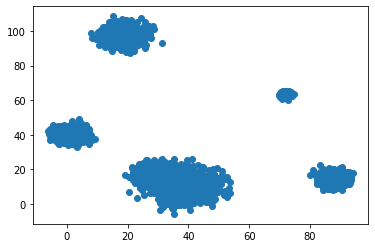

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


N = 1000
Clusters = 6
alfa = 100
beta = 5

x_datos = []
y_datos = []

for c in range(Clusters):
  x0 = alfa*np.random.rand()
  y0 = alfa*np.random.rand()
  sigma = beta*np.random.rand()
  x = list(np.random.normal(x0,sigma,N)) 
  y = list(np.random.normal(y0,sigma,N)) 
  x_datos = x_datos + x
  y_datos = y_datos + y

plt.scatter(x_datos,y_datos)

x = pd.DataFrame()
x["X"] = x_datos
x["Y"] = y_datos

Ahora voy a utilizar estos datos para tratar de encontrar clustes en ellos. Uso la implementacion de SkLearn.

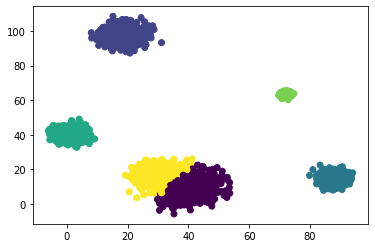

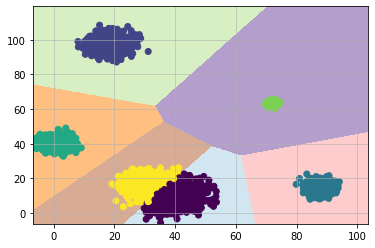

In [8]:
from sklearn.cluster import KMeans
k = Clusters
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

plt.figure()
plt.scatter(x_datos,y_datos,c=y_pred)

h = 0.1     
x_min, x_max = 1.1*min(x_datos),1.1*max(x_datos)
y_min, y_max = 1.1*min(y_datos),1.1*max(y_datos)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(x_datos,y_datos,c=y_pred)
plt.grid(axis="both", alpha=0.7)

Además podemos pedirle que nos devuelva los centroides de cada cluster. Vamos a graficarlos para ver donde se encuentran. 

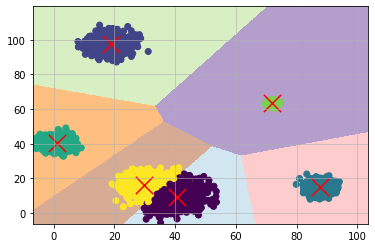

In [9]:
centroides = pd.DataFrame(kmeans.cluster_centers_)
plt.figure()
plt.imshow(Z, interpolation="nearest",extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired, aspect="auto", origin="lower",alpha=0.5)
plt.scatter(x_datos,y_datos,c=y_pred)
plt.scatter(centroides[0],centroides[1],marker='x',s=300,linewidths=1,c='red')
plt.grid(axis="both", alpha=0.7)


La division resultante entre los clusters y las regiones que definen se llama de _Voroni_. 

Este tipo de clasterizacion se llama _hard clustering_ porque asigna cada instancia a un unico cluster. Otra cosa que se puede hacer es utilizar una estrategia de _soft culustering_ que asigna un score. Este score puede ser definido de muchas formas, una forma comunmente utilizada es directamente asignar la distancia al centroide.